In [2]:
import requests
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Job Title  60 non-null     object
 1   Company    60 non-null     object
 2   Location   60 non-null     object
dtypes: object(3)
memory usage: 1.5+ KB


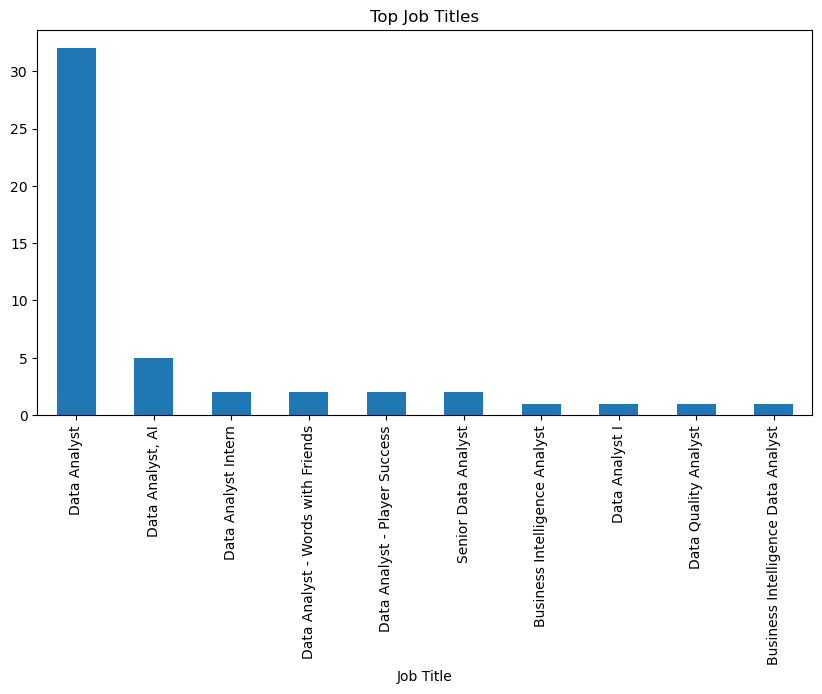

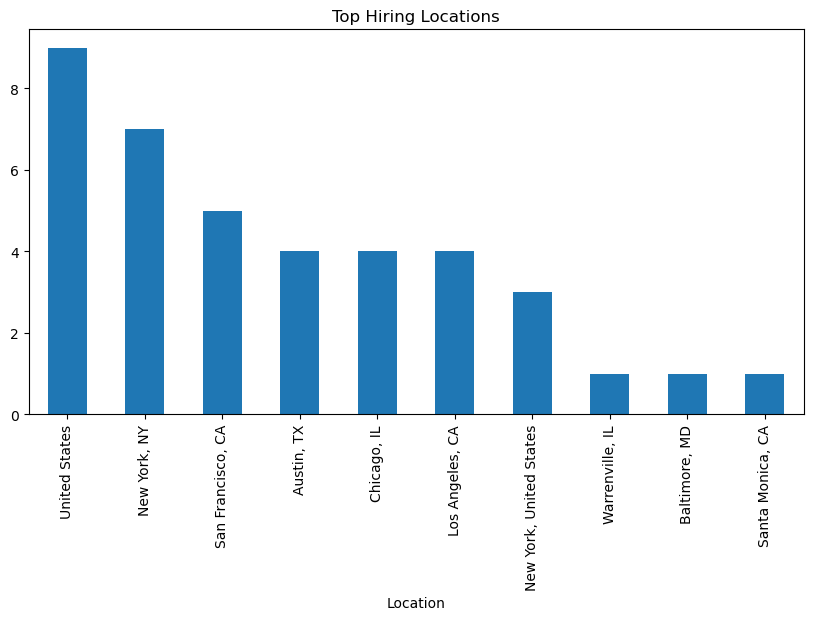

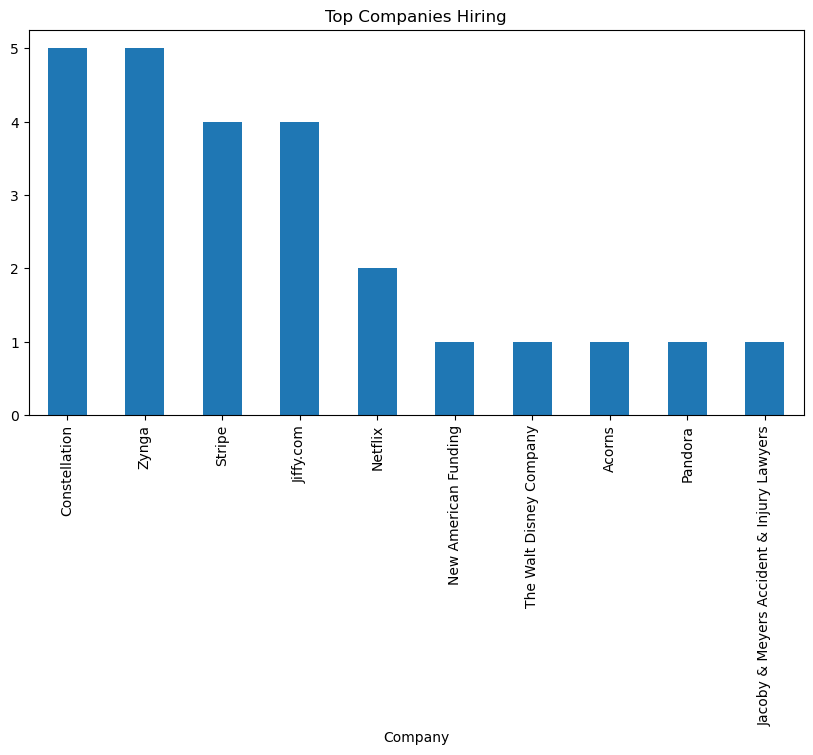

In [3]:
url = "https://www.linkedin.com/jobs/search?keywords=data%20analyst"

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/121.0.0.0 Safari/537.36',
    
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7',
    'Accept-Language': 'en-US,en;q=0.9',
    'Referer': 'https://www.google.com',
    'DNT': '1',
    'Connection': 'keep-alive',
    'Upgrade-Insecure-Requests': '1'
}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")


jobs = soup.find_all("div", class_="base-card")

job_title = []
company = []
location = []

for job in jobs:
    title = job.find("h3")
    company_name = job.find("h4")
    job_location = job.find("span", class_="job-search-card__location")

    job_title.append(title.text.strip() if title else None)
    company.append(company_name.text.strip() if company_name else None)
    location.append(job_location.text.strip() if job_location else None)

    ###  DataFrame

    df = pd.DataFrame({
    "Job Title": job_title,
    "Company": company,
    "Location": location
})

df.head()

#### datacleaning
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

df.reset_index(drop=True, inplace=True)

### Dataset Overview
df.info()
df.describe(include='object')

### Top Job Titles
df['Job Title'].value_counts().head(10)

## Visualization:

plt.figure(figsize=(10,5))
df['Job Title'].value_counts().head(10).plot(kind='bar')
plt.title("Top Job Titles")
plt.show()


### Top Hiring Locations
plt.figure(figsize=(10,5))
df['Location'].value_counts().head(10).plot(kind='bar')
plt.title("Top Hiring Locations")
plt.show()

#### Company-wise Job Count
plt.figure(figsize=(10,5))
df['Company'].value_counts().head(10).plot(kind='bar')
plt.title("Top Companies Hiring")
plt.show()

## Save Dataset
df.to_csv("linkedin_jobs_data.csv", index=False)